# Parte 1

In [1]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np
import pandas as pd


Carga de datos

In [2]:
boston = pd.read_csv('Boston.csv')
boston.head(1)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [4]:
X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = boston[['medv']]


División de datos

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.25,
                                                   shuffle= True, #aleatorizar los datos
                                                   random_state= 0) 

# Parte 2

Función RMSE

In [6]:
import math  
import numpy as np  

def rmse(true, predicted):
  y = np.array(true)
  y_hat = np.array(predicted)
  n = len(true)
  summation = 0 
  for i in range (0,n):  #looping through each element of the list
    difference = y[i] - y_hat[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
  MSE = summation/n  #dividing summation by total values to obtain average
  RMSE = math.sqrt(MSE)
  print('RMSE empleando fórmula manual: ' , RMSE)


Comprobación de fórmula

In [7]:
y_testing = [3, -0.5, 2, 7]
y_predicted = [2.5, 0.0, 2, 8]
print('RMSE utilizando mean_squared_error de sklearn.metrics: ',mean_squared_error(y_testing, y_predicted)**0.5)
rmse(y_predicted, y_testing)

RMSE utilizando mean_squared_error de sklearn.metrics:  0.6123724356957945
RMSE empleando fórmula manual:  0.6123724356957945


Modelo con datos de entrenamiento

In [8]:
reg = KNeighborsRegressor(3)
reg.fit(X_train, y_train)
train_predicted = reg.predict(X_train)
test_predicted = reg.predict(X_test)


In [9]:
rmse(true=y_train, predicted=train_predicted)
print('RMSE utilizando mean_squared_error de sklearn.metrics: ',mean_squared_error(y_train, train_predicted)**0.5)

RMSE empleando fórmula manual:  4.311224977113058
RMSE utilizando mean_squared_error de sklearn.metrics:  4.311224977113059


La ventaja de calcular RMSE en un set de datos de prueba y de entrenamiento es que te permite ver qué tan bueno es el modelo para predecir el comportamiento de Y bajo un ambiente que no reconoce (Es decir, en casos donde no ha observado qué valor toma Y al tener ciertas características de X)

# Parte 3

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

Validación cruzada

In [19]:
def cross_val(X_train, y_train, k):
     k_splits = KFold(n_splits=k, random_state=1, shuffle=True) 
     reg = KNeighborsRegressor(3)
     reg.fit(X_train, y_train)
     scores = cross_val_score(reg, X=X_train, y=y_train, cv=k_splits, n_jobs=1)
     print('RMSE', sqrt(mean(absolute(scores))))

In [20]:
cross_val(X_train=X_train, y_train=y_train, k=5)  

RMSE 0.7307878854022966


In [24]:
reg = KNeighborsRegressor(3)
reg.fit(X_train, y_train)
train_predicted = reg.predict(X_train)
test_predicted = reg.predict(X_test)
rmse(true=y_train, predicted=train_predicted)
print('RMSE utilizando mean_squared_error de sklearn.metrics: ',mean_squared_error(y_train, train_predicted)**0.5)

RMSE empleando fórmula manual:  4.311224977113058
RMSE utilizando mean_squared_error de sklearn.metrics:  4.311224977113059


# Parte 4

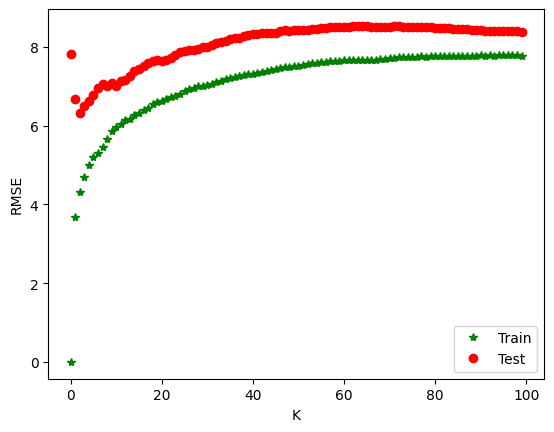

In [34]:
rmse_resultados_train = []
rmse_resultados_test = []

for num in range(1,101):
    reg = KNeighborsRegressor(num)
    reg.fit(X_train, y_train)
    train_predicted = reg.predict(X_train)
    test_predicted = reg.predict(X_test)
    rmse = mean_squared_error(y_train, train_predicted)**0.5
    rmse_resultados_train.append(rmse)
    rmse = mean_squared_error(y_test, test_predicted)**0.5
    rmse_resultados_test.append(rmse)

import matplotlib.pyplot as plt
plt.plot(rmse_resultados_train,'g*', rmse_resultados_test, 'ro')
plt.legend(["Train", "Test"], loc ="lower right")
plt.ylabel('RMSE')
plt.xlabel('K')
plt.show()

Cuando K es pequeño, el error cuadrático medio es menor en comparación con un valor de K mayor. Implica que el margen de error aumenta conforme el número de vecinos cercanos de referencia aumenta; especialmente importante si se tienen muchas variables predictoras.